In [1]:
import os
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# ETF list
etf_list = [
    'XLK', 'XLF', 'XLV', 'XLE', 'XLI', 'XLY', 'XLP', 'XLRE', 'XLU', 'XLB', 'XLC',
    'SOXX', 'SH', 'DOG', 'RWM', 'ITA', 'JETS', 'PSQ', 'VNQ', 'SPY'
]

# Date range: from 10 years ago to now
today = datetime.today()
back_time = today - timedelta(weeks=52 * 10)
start_date = back_time.strftime('%Y-%m-%d')
end_date = today.strftime('%Y-%m-%d')

print(f"🗕️ Downloading weekly data from {start_date} to {end_date}")

# Ensure dataset/ exists
dataset_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset'))
os.makedirs(dataset_path, exist_ok=True)

# Containers
adjclose_data, volume_data, high_data, low_data = {}, {}, {}, {}

# Download each ETF
for symbol in etf_list:
    print(f"⬇️ Downloading {symbol}...")
    data = yf.download(
        symbol,
        start=start_date,
        end=end_date,
        interval='1wk',  # back to Yahoo's default weekly format (week ending on Friday)
        auto_adjust=False,
        progress=False
    )
    if not data.empty:
        data = data[~data.index.duplicated(keep='first')].sort_index()
        adjclose_data[symbol] = data[['Adj Close']].rename(columns={'Adj Close': symbol})
        volume_data[symbol] = data[['Volume']].rename(columns={'Volume': symbol})
        high_data[symbol] = data[['High']].rename(columns={'High': symbol})
        low_data[symbol] = data[['Low']].rename(columns={'Low': symbol})

# Merge and save
def combine_and_save(data_dict, filename):
    df = pd.concat(data_dict.values(), axis=1)
    df = df.apply(pd.to_numeric, errors='coerce')
    df.index = pd.to_datetime(df.index, errors='coerce')
    df = df[~df.index.duplicated(keep='first')].sort_index()
    df.dropna(axis=0, how='all', inplace=True)
    path = os.path.join(dataset_path, filename)
    df.to_csv(path)
    print(f"✅ Saved: {filename}")
    return df

# Save all
price_df = combine_and_save(adjclose_data, 'etf_prices_weekly.csv')
volume_df = combine_and_save(volume_data, 'etf_volume_weekly.csv')
high_df = combine_and_save(high_data, 'etf_high_weekly.csv')
low_df = combine_and_save(low_data, 'etf_low_weekly.csv')

# Preview
price_df.head()


🗕️ Downloading weekly data from 2015-05-06 to 2025-04-23
⬇️ Downloading XLK...
⬇️ Downloading XLF...
⬇️ Downloading XLV...
⬇️ Downloading XLE...
⬇️ Downloading XLI...
⬇️ Downloading XLY...
⬇️ Downloading XLP...
⬇️ Downloading XLRE...
⬇️ Downloading XLU...
⬇️ Downloading XLB...
⬇️ Downloading XLC...
⬇️ Downloading SOXX...
⬇️ Downloading SH...
⬇️ Downloading DOG...
⬇️ Downloading RWM...
⬇️ Downloading ITA...
⬇️ Downloading JETS...
⬇️ Downloading PSQ...
⬇️ Downloading VNQ...
⬇️ Downloading SPY...
✅ Saved: etf_prices_weekly.csv
✅ Saved: etf_volume_weekly.csv
✅ Saved: etf_high_weekly.csv
✅ Saved: etf_low_weekly.csv


Price,XLK,XLF,XLV,XLE,XLI,XLY,XLP,XLRE,XLU,XLB,XLC,SOXX,SH,DOG,RWM,ITA,JETS,PSQ,VNQ,SPY
Ticker,XLK,XLF,XLV,XLE,XLI,XLY,XLP,XLRE,XLU,XLB,XLC,SOXX,SH,DOG,RWM,ITA,JETS,PSQ,VNQ,SPY
Date,,,,,,,,,,,,,,,,,,,,
2015-05-04,38.081745,16.607912,62.328033,54.583645,47.107681,68.427330,37.711857,NaN,31.769217,42.112518,NaN,28.441841,159.057907,78.749916,51.727146,54.787800,23.647640,237.650360,53.803024,178.051498
2015-05-11,38.329544,16.567665,63.015373,53.855949,47.548954,68.418396,38.156689,NaN,31.978460,42.063534,NaN,28.762245,158.297607,78.259254,51.239155,55.656292,23.714336,235.520828,54.210827,178.741333
2015-05-18,38.586193,16.674990,63.626354,53.542171,47.374104,68.731071,37.773209,NaN,32.158833,41.745052,NaN,29.208433,157.841400,78.329353,50.925442,55.633793,22.027941,233.476608,53.515560,179.204147
2015-05-25,38.382656,16.500593,63.592407,52.333794,46.466599,68.159332,37.420403,NaN,32.108330,41.328583,NaN,30.265493,159.133972,79.205505,51.125874,54.702297,22.008884,234.243164,52.907215,177.647614
2015-06-01,38.010941,16.628033,63.083237,51.853115,46.508221,68.355858,36.500031,NaN,30.823996,40.838619,NaN,29.474945,160.198410,79.906448,50.472309,54.378296,22.018414,235.776398,51.616962,176.494843


In [2]:
import os 
import yfinance as yf
import pandas as pd
from datetime import datetime

# Macro indicator tickers on Yahoo Finance
macro_tickers = {
    'VIX': '^VIX',               # Volatility Index
    '10Y_Yield': '^TNX',         # 10-Year Treasury Yield (multiply by 0.1)
    'USD_Index': 'DX-Y.NYB',     # U.S. Dollar Index (ICE Dollar Index)
    'WTI_Crude': 'CL=F'          # Crude Oil (WTI Futures)
}

# Align with ETF backtest window using back_time
start_date = back_time.strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')

print(f"📊 Downloading macro data from {start_date} to {end_date}")

# Download weekly data
macro_data = {}
for name, ticker in macro_tickers.items():
    print(f"⬇️ Downloading {name} ({ticker})...")
    data = yf.download(ticker, start=start_date, end=end_date, interval='1wk', auto_adjust=False, progress=False)
    if not data.empty:
        macro_data[name] = data[['Close']].rename(columns={'Close': name})

# Combine all macro indicators into one DataFrame
macro_df = pd.concat(macro_data.values(), axis=1)

# Fix 10Y yield scale
if '10Y_Yield' in macro_df.columns:
    macro_df['10Y_Yield'] = macro_df['10Y_Yield'] * 0.1

# Clean and format
macro_df = macro_df.apply(pd.to_numeric, errors='coerce')
macro_df.index = pd.to_datetime(macro_df.index)
macro_df = macro_df[~macro_df.index.duplicated(keep='first')]
macro_df.sort_index(inplace=True)
macro_df.dropna(inplace=True)

# Save to CSV
macro_save_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset', 'macro_indicators_weekly.csv'))
macro_df.to_csv(macro_save_path)
print(f"✅ Macro indicators saved to: {macro_save_path}")

# Preview
macro_df.head()


📊 Downloading macro data from 2015-05-06 to 2025-04-23
⬇️ Downloading VIX (^VIX)...
⬇️ Downloading 10Y_Yield (^TNX)...
⬇️ Downloading USD_Index (DX-Y.NYB)...
⬇️ Downloading WTI_Crude (CL=F)...
✅ Macro indicators saved to: D:\CodingWorks\Weekly_Swing_TransformerQT\dataset\macro_indicators_weekly.csv


Price,VIX,10Y_Yield,USD_Index,WTI_Crude
Ticker,^VIX,^TNX,DX-Y.NYB,CL=F
Date,,,,
2015-05-04,12.86,0.2150,94.790001,59.389999
2015-05-11,12.38,0.2141,93.139999,59.689999
2015-05-18,12.13,0.2215,96.010002,59.720001
2015-05-25,13.84,0.2095,96.910004,60.299999
2015-06-01,14.21,0.2402,96.309998,59.130001


In [3]:
import pandas as pd
import os
from ta import momentum, trend, volume

# === Paths ===
price_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset', 'etf_prices_weekly.csv'))
volume_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset', 'etf_volume_weekly.csv'))

# === Helper to load ETF CSVs ===
def load_etf_csv(path, name='[unknown]'):
    try:
        header_row = pd.read_csv(path, header=None, nrows=2)
        columns = header_row.iloc[1].tolist()[1:]
        df = pd.read_csv(path, skiprows=3, header=None)
        df = df.iloc[:, :len(columns) + 1]
        df.columns = ['Date'] + columns
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df = df.set_index('Date')
        df = df.apply(pd.to_numeric, errors='coerce')
        print(f"✅ Loaded {name} with {len(columns)} tickers")
        return df
    except Exception as e:
        print(f"❌ Failed to load {name}: {e}")
        raise

# === Load data ===
price_df = load_etf_csv(price_path, name='ETF Prices')
volume_df = load_etf_csv(volume_path, name='ETF Volume')

# === Feature storage ===
features_all = []
skipped = []

# === Feature generation loop ===
for symbol in price_df.columns:
    if symbol not in volume_df.columns:
        print(f"⚠️ Skipping {symbol}: volume data missing.")
        skipped.append(symbol)
        continue

    df = pd.DataFrame(index=price_df.index)
    df['close'] = price_df[symbol]
    df['volume'] = volume_df[symbol]

    try:
        # === Return-based technical indicators ===
        # df[f'{symbol}_ret_1w'] = df['close'].pct_change(1)
        df[f'{symbol}_ret_3w'] = df['close'].pct_change(3)
        df[f'{symbol}_ret_6w'] = df['close'].pct_change(6)

        high = df['close'].rolling(window=14).max()
        low = df['close'].rolling(window=14).min()
        df[f'{symbol}_stoch_k'] = 100 * (df['close'] - low) / (high - low)
        df[f'{symbol}_stoch_d'] = df[f'{symbol}_stoch_k'].rolling(window=3).mean()
        df[f'{symbol}_williams_r'] = -100 * (high - df['close']) / (high - low)

        df[f'{symbol}_cci'] = trend.cci(high=df['close'], low=df['close'], close=df['close'], window=20)
        df[f'{symbol}_rsi'] = momentum.rsi(df['close'], window=14)
        df[f'{symbol}_obv'] = volume.on_balance_volume(df['close'], df['volume'])

        df[f'{symbol}_macd'] = trend.macd(df['close'])
        df[f'{symbol}_macd_signal'] = trend.macd_signal(df['close'])
        df[f'{symbol}_macd_diff'] = trend.macd_diff(df['close'])

        # === Price/volume variation ===
        df[f'{symbol}_price_change'] = df['close'].pct_change(1)
        df[f'{symbol}_volume_change'] = df['volume'].pct_change(1)

        # === Short-term KST (custom) ===
        roc1 = df['close'].pct_change(10)
        roc2 = df['close'].pct_change(15)
        roc3 = df['close'].pct_change(20)
        roc4 = df['close'].pct_change(30)
        df[f'{symbol}_kst_short'] = (
            roc1.rolling(10).mean() +
            roc2.rolling(10).mean() * 2 +
            roc3.rolling(10).mean() * 3 +
            roc4.rolling(15).mean() * 4
        )

        derived_cols = df.columns.difference(['close', 'volume'])
        feature_df = df[derived_cols].copy()

        features_all.append(feature_df)
        print(f"📈 {symbol}: {feature_df.dropna(how='all').shape[0]} valid rows")

    except Exception as e:
        print(f"❌ Error processing {symbol}: {e}")
        skipped.append(symbol)

# === Final merge ===
if len(features_all) == 0:
    raise ValueError("🛑 No valid ETF features generated.")

features_df = pd.concat(features_all, axis=1).sort_index()
features_df = features_df[~features_df.index.duplicated(keep='first')]

print("📀 Final feature shape:", features_df.shape)

# === Save to CSV ===
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset'))
features_df.to_csv(os.path.join(base_dir, 'weekly_etf_tech_feature.csv'))
print(f"✅ Saved features to: weekly_etf_tech_feature.csv")


✅ Loaded ETF Prices with 20 tickers
✅ Loaded ETF Volume with 20 tickers
📈 XLK: 521 valid rows
📈 XLF: 521 valid rows
📈 XLV: 521 valid rows
📈 XLE: 521 valid rows
📈 XLI: 521 valid rows
📈 XLY: 521 valid rows
📈 XLP: 521 valid rows
📈 XLRE: 508 valid rows
📈 XLU: 521 valid rows
📈 XLB: 521 valid rows
📈 XLC: 508 valid rows
📈 SOXX: 521 valid rows
📈 SH: 521 valid rows
📈 DOG: 521 valid rows
📈 RWM: 521 valid rows
📈 ITA: 521 valid rows
📈 JETS: 521 valid rows
📈 PSQ: 521 valid rows
📈 VNQ: 521 valid rows
📈 SPY: 521 valid rows
📀 Final feature shape: (521, 280)
✅ Saved features to: weekly_etf_tech_feature.csv


In [4]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler

# === Paths ===
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset'))
feat_path = os.path.join(base_dir, 'weekly_etf_tech_feature.csv')
macro_path = os.path.join(base_dir, 'macro_indicators_weekly.csv')
price_path = os.path.join(base_dir, 'etf_prices_weekly.csv')
volume_path = os.path.join(base_dir, 'etf_volume_weekly.csv')

# === Load main features ===
feat_df = pd.read_csv(feat_path, index_col=0, parse_dates=True)

# === Load and parse macro indicators ===
macro_raw = pd.read_csv(macro_path, header=None)
macro_start = macro_raw.index[macro_raw[0] == 'Price'].tolist()[0]
macro_cols = macro_raw.iloc[macro_start].tolist()
macro_df = pd.read_csv(macro_path, skiprows=macro_start + 1, header=None)
macro_df.columns = macro_cols
macro_df['Price'] = pd.to_datetime(macro_df['Price'], errors='coerce')  # 'Price' is actually the 'Date'
macro_df = macro_df.rename(columns={'Price': 'Date'}).set_index('Date')
macro_df = macro_df.apply(pd.to_numeric, errors='coerce')
macro_df = macro_df[~macro_df.index.duplicated()].sort_index()

# === Load ETF price and volume ===
ticker_row = pd.read_csv(price_path, header=None, nrows=2).iloc[1, 1:].tolist()
price_df = pd.read_csv(price_path, skiprows=3, header=None)
volume_df = pd.read_csv(volume_path, skiprows=3, header=None)

price_df = price_df.iloc[:, :len(ticker_row)+1]
price_df.columns = ['Date'] + ticker_row
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df = price_df.set_index('Date').apply(pd.to_numeric, errors='coerce')

volume_df = volume_df.iloc[:, :len(ticker_row)+1]
volume_df.columns = ['Date'] + ticker_row
volume_df['Date'] = pd.to_datetime(volume_df['Date'])
volume_df = volume_df.set_index('Date').apply(pd.to_numeric, errors='coerce')

# === Output Directory ===
norm_dir = os.path.join(base_dir, 'normalized_matrix')
os.makedirs(norm_dir, exist_ok=True)

# === Normalize & Save per ETF ===
scaler = StandardScaler()

for ticker in ticker_row:
    feat_cols = [col for col in feat_df.columns if col.startswith(f'{ticker}_')]
    if len(feat_cols) == 0:
        print(f"⚠️ No features found for {ticker}, skipping...")
        continue

    df = feat_df[feat_cols].copy()
    df.columns = [col.replace(f'{ticker}_', '') for col in df.columns]

    df['price'] = price_df[ticker].pct_change()
    df['volume'] = volume_df[ticker].pct_change()

    # === Merge with true macro indicators ===
    df = df.join(macro_df, how='left')

    # === Build missing mask BEFORE filling
    mask = df.isna().astype(float)

    # === Fill and normalize only technical + pct change features, not macro
    macro_cols = macro_df.columns
    norm_cols = df.columns.difference(macro_cols)
    df[norm_cols] = scaler.fit_transform(df[norm_cols].fillna(0.0))
    df[macro_cols] = df[macro_cols].fillna(0.0)  # keep raw values for macro features

    # === Save
    df.to_csv(os.path.join(norm_dir, f'{ticker}_combined.csv'))
    mask.to_csv(os.path.join(norm_dir, f'{ticker}_mask.csv'))
    print(f"✅ Saved {ticker}: {df.shape[0]} rows, {df.shape[1]} features")


C:\Users\user\AppData\Local\Temp\ipykernel_38452\2028834899.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  macro_df['Price'] = pd.to_datetime(macro_df['Price'], errors='coerce')  # 'Price' is actually the 'Date'


✅ Saved XLK: 521 rows, 20 features
✅ Saved XLF: 521 rows, 20 features
✅ Saved XLV: 521 rows, 20 features
✅ Saved XLE: 521 rows, 20 features
✅ Saved XLI: 521 rows, 20 features
✅ Saved XLY: 521 rows, 20 features
✅ Saved XLP: 521 rows, 20 features
✅ Saved XLRE: 521 rows, 20 features
✅ Saved XLU: 521 rows, 20 features
✅ Saved XLB: 521 rows, 20 features
✅ Saved XLC: 521 rows, 20 features
✅ Saved SOXX: 521 rows, 20 features
✅ Saved SH: 521 rows, 20 features
✅ Saved DOG: 521 rows, 20 features
✅ Saved RWM: 521 rows, 20 features
✅ Saved ITA: 521 rows, 20 features
✅ Saved JETS: 521 rows, 20 features
✅ Saved PSQ: 521 rows, 20 features
✅ Saved VNQ: 521 rows, 20 features
✅ Saved SPY: 521 rows, 20 features


# start training

In [5]:
import os
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

# === Paths ===
data_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset', 'normalized_matrix'))

# === Dataset ===
class ETFDataset(Dataset):
    def __init__(self, combined_csv, mask_csv, etf, return_feature="price_change", seq_len=4):
        self.df = pd.read_csv(combined_csv, index_col=0)
        self.mask = pd.read_csv(mask_csv, index_col=0)
        self.seq_len = seq_len

        # Extract the correct target column
        target_col = f"{etf}_{return_feature}"
        if target_col not in self.df.columns:
            raise ValueError(f"❌ Target column {target_col} not found in {combined_csv}")

        print(f"📌 Predicting: {target_col}")

        self.target_index = self.df.columns.get_loc(target_col)
        self.raw_X = self.df.values.astype(np.float32)
        self.raw_M = self.mask.values.astype(np.float32)

        self.X, self.M, self.y = [], [], []
        for i in range(seq_len, len(self.raw_X)):
            self.X.append(self.raw_X[i-seq_len:i])
            self.M.append(self.raw_M[i-seq_len:i])
            self.y.append(self.raw_X[i, self.target_index])

        self.X = np.stack(self.X)
        self.M = np.stack(self.M)
        self.y = np.array(self.y)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return (
            torch.tensor(self.X[idx]),
            torch.tensor(self.M[idx]),
            torch.tensor(self.y[idx])
        )


# === Model with Attention Pooling ===
class DualTransformerModel(nn.Module):
    def __init__(self, num_features, hidden_dim=128, num_layers=2):
        super().__init__()

        # Choose the highest possible nhead divisor of num_features
        possible_heads = [h for h in [8, 4, 2, 1] if num_features % h == 0]
        nhead = possible_heads[0]

        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=num_features,
                nhead=nhead,
                dim_feedforward=hidden_dim,
                batch_first=True
            ),
            num_layers=num_layers
        )
        self.attn_query = nn.Parameter(torch.randn(1, 1, num_features))
        self.output = nn.Linear(num_features, 1)

    def forward(self, x, mask):
        x_masked = x * (1 - mask)
        enc = self.encoder(x_masked)

        # Apply learnable attention pooling
        attn_scores = torch.matmul(self.attn_query, enc.transpose(1, 2))  # (1, 1, F) x (B, F, T) = (B, 1, T)
        attn_weights = torch.softmax(attn_scores, dim=-1)  # (B, 1, T)
        pooled = torch.bmm(attn_weights, enc).squeeze(1)  # (B, 1, T) x (B, T, F) = (B, 1, F) → (B, F)

        return self.output(pooled).squeeze(-1)

# === Training Params ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 0.001
max_epochs = 3000
seq_len = 4

# === Training Function ===
def train_one_etf(etf):
    print(f"\n🚀 Training {etf}")
    feat_path = os.path.join(data_dir, f"{etf}_combined.csv")
    mask_path = os.path.join(data_dir, f"{etf}_mask.csv")
    dataset = ETFDataset(feat_path, mask_path, etf=etf, return_feature="price_change", seq_len=seq_len)
    loader = DataLoader(dataset, batch_size=32, shuffle=False)

    X, _, _ = next(iter(loader))
    model = DualTransformerModel(num_features=X.shape[-1]).to(device)
    model.device = device

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    mse_loss = nn.MSELoss()
    mae_loss = nn.L1Loss()

    best_models = []

    for epoch in range(max_epochs):
        model.train()
        total_loss, total_mae, total_win = 0, 0, 0

        for X, M, y in loader:
            X, M, y = X.to(model.device), M.to(model.device), y.to(model.device)
            pred = model(X, M)

            mse = mse_loss(pred, y)
            mae = mae_loss(pred, y)
            direction_loss = 1 - (torch.sign(pred) == torch.sign(y)).float().mean()
            loss = 0.4*mse + 0.25 * mae + 0.35 * direction_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_mae += mae.item()
            total_win += (torch.sign(pred) == torch.sign(y)).float().mean().item()

        avg_loss = total_loss / len(loader)
        avg_mae = total_mae / len(loader)
        avg_win = total_win / len(loader)
        score = avg_win * 0.6 + (1 - avg_mae) * 0.4
        best_models.append((score, model.state_dict(), avg_win, avg_mae))

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}: Loss={avg_loss:.4f}, MAE={avg_mae:.4f}, WinRate={avg_win:.4f}")

    # Save top 5 models
    top5 = sorted(best_models, key=lambda x: -x[0])[:5]
    weight_sum = sum(x[0] for x in top5)

    # Ensure model_weights folder exists
    save_dir = os.path.join("..", "model_weights")
    os.makedirs(save_dir, exist_ok=True)

    for i, (score, weights, win, mae) in enumerate(top5):
        out = {
            'weights': weights,
            'score': score,
            'win_rate': win,
            'mae': mae,
            'weight': score / weight_sum
        }
        save_path = os.path.join(save_dir, f"{etf}_top{i+1}.pt")
        torch.save(out, save_path)

# === Execute ===
for etf in etf_list:
    train_one_etf(etf)



🚀 Training XLK
🎯 Predicting feature: price_change at column index 6
Epoch 100: Loss=0.7054, MAE=0.7139, WinRate=0.5735
Epoch 200: Loss=0.6036, MAE=0.6515, WinRate=0.5956
Epoch 300: Loss=0.5449, MAE=0.6177, WinRate=0.6415
Epoch 400: Loss=0.4865, MAE=0.5611, WinRate=0.6489
Epoch 500: Loss=0.4456, MAE=0.5303, WinRate=0.6838
Epoch 600: Loss=0.4216, MAE=0.5041, WinRate=0.7070
Epoch 700: Loss=0.3500, MAE=0.4467, WinRate=0.7445
Epoch 800: Loss=0.3377, MAE=0.4336, WinRate=0.7327
Epoch 900: Loss=0.3653, MAE=0.4565, WinRate=0.7224
Epoch 1000: Loss=0.3197, MAE=0.4220, WinRate=0.7739
Epoch 1100: Loss=0.2749, MAE=0.3683, WinRate=0.7960
Epoch 1200: Loss=0.2579, MAE=0.3632, WinRate=0.8217
Epoch 1300: Loss=0.2741, MAE=0.3689, WinRate=0.7989
Epoch 1400: Loss=0.2299, MAE=0.3233, WinRate=0.8254
Epoch 1500: Loss=0.2068, MAE=0.3052, WinRate=0.8456
Epoch 1600: Loss=0.2242, MAE=0.3393, WinRate=0.8401
Epoch 1700: Loss=0.2039, MAE=0.3007, WinRate=0.8430
Epoch 1800: Loss=0.1841, MAE=0.2842, WinRate=0.8566
Epoc

C:\Users\user\AppData\Local\Temp\ipykernel_38452\1234984278.py:90: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\user\anaconda3\envs\stock_pred\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


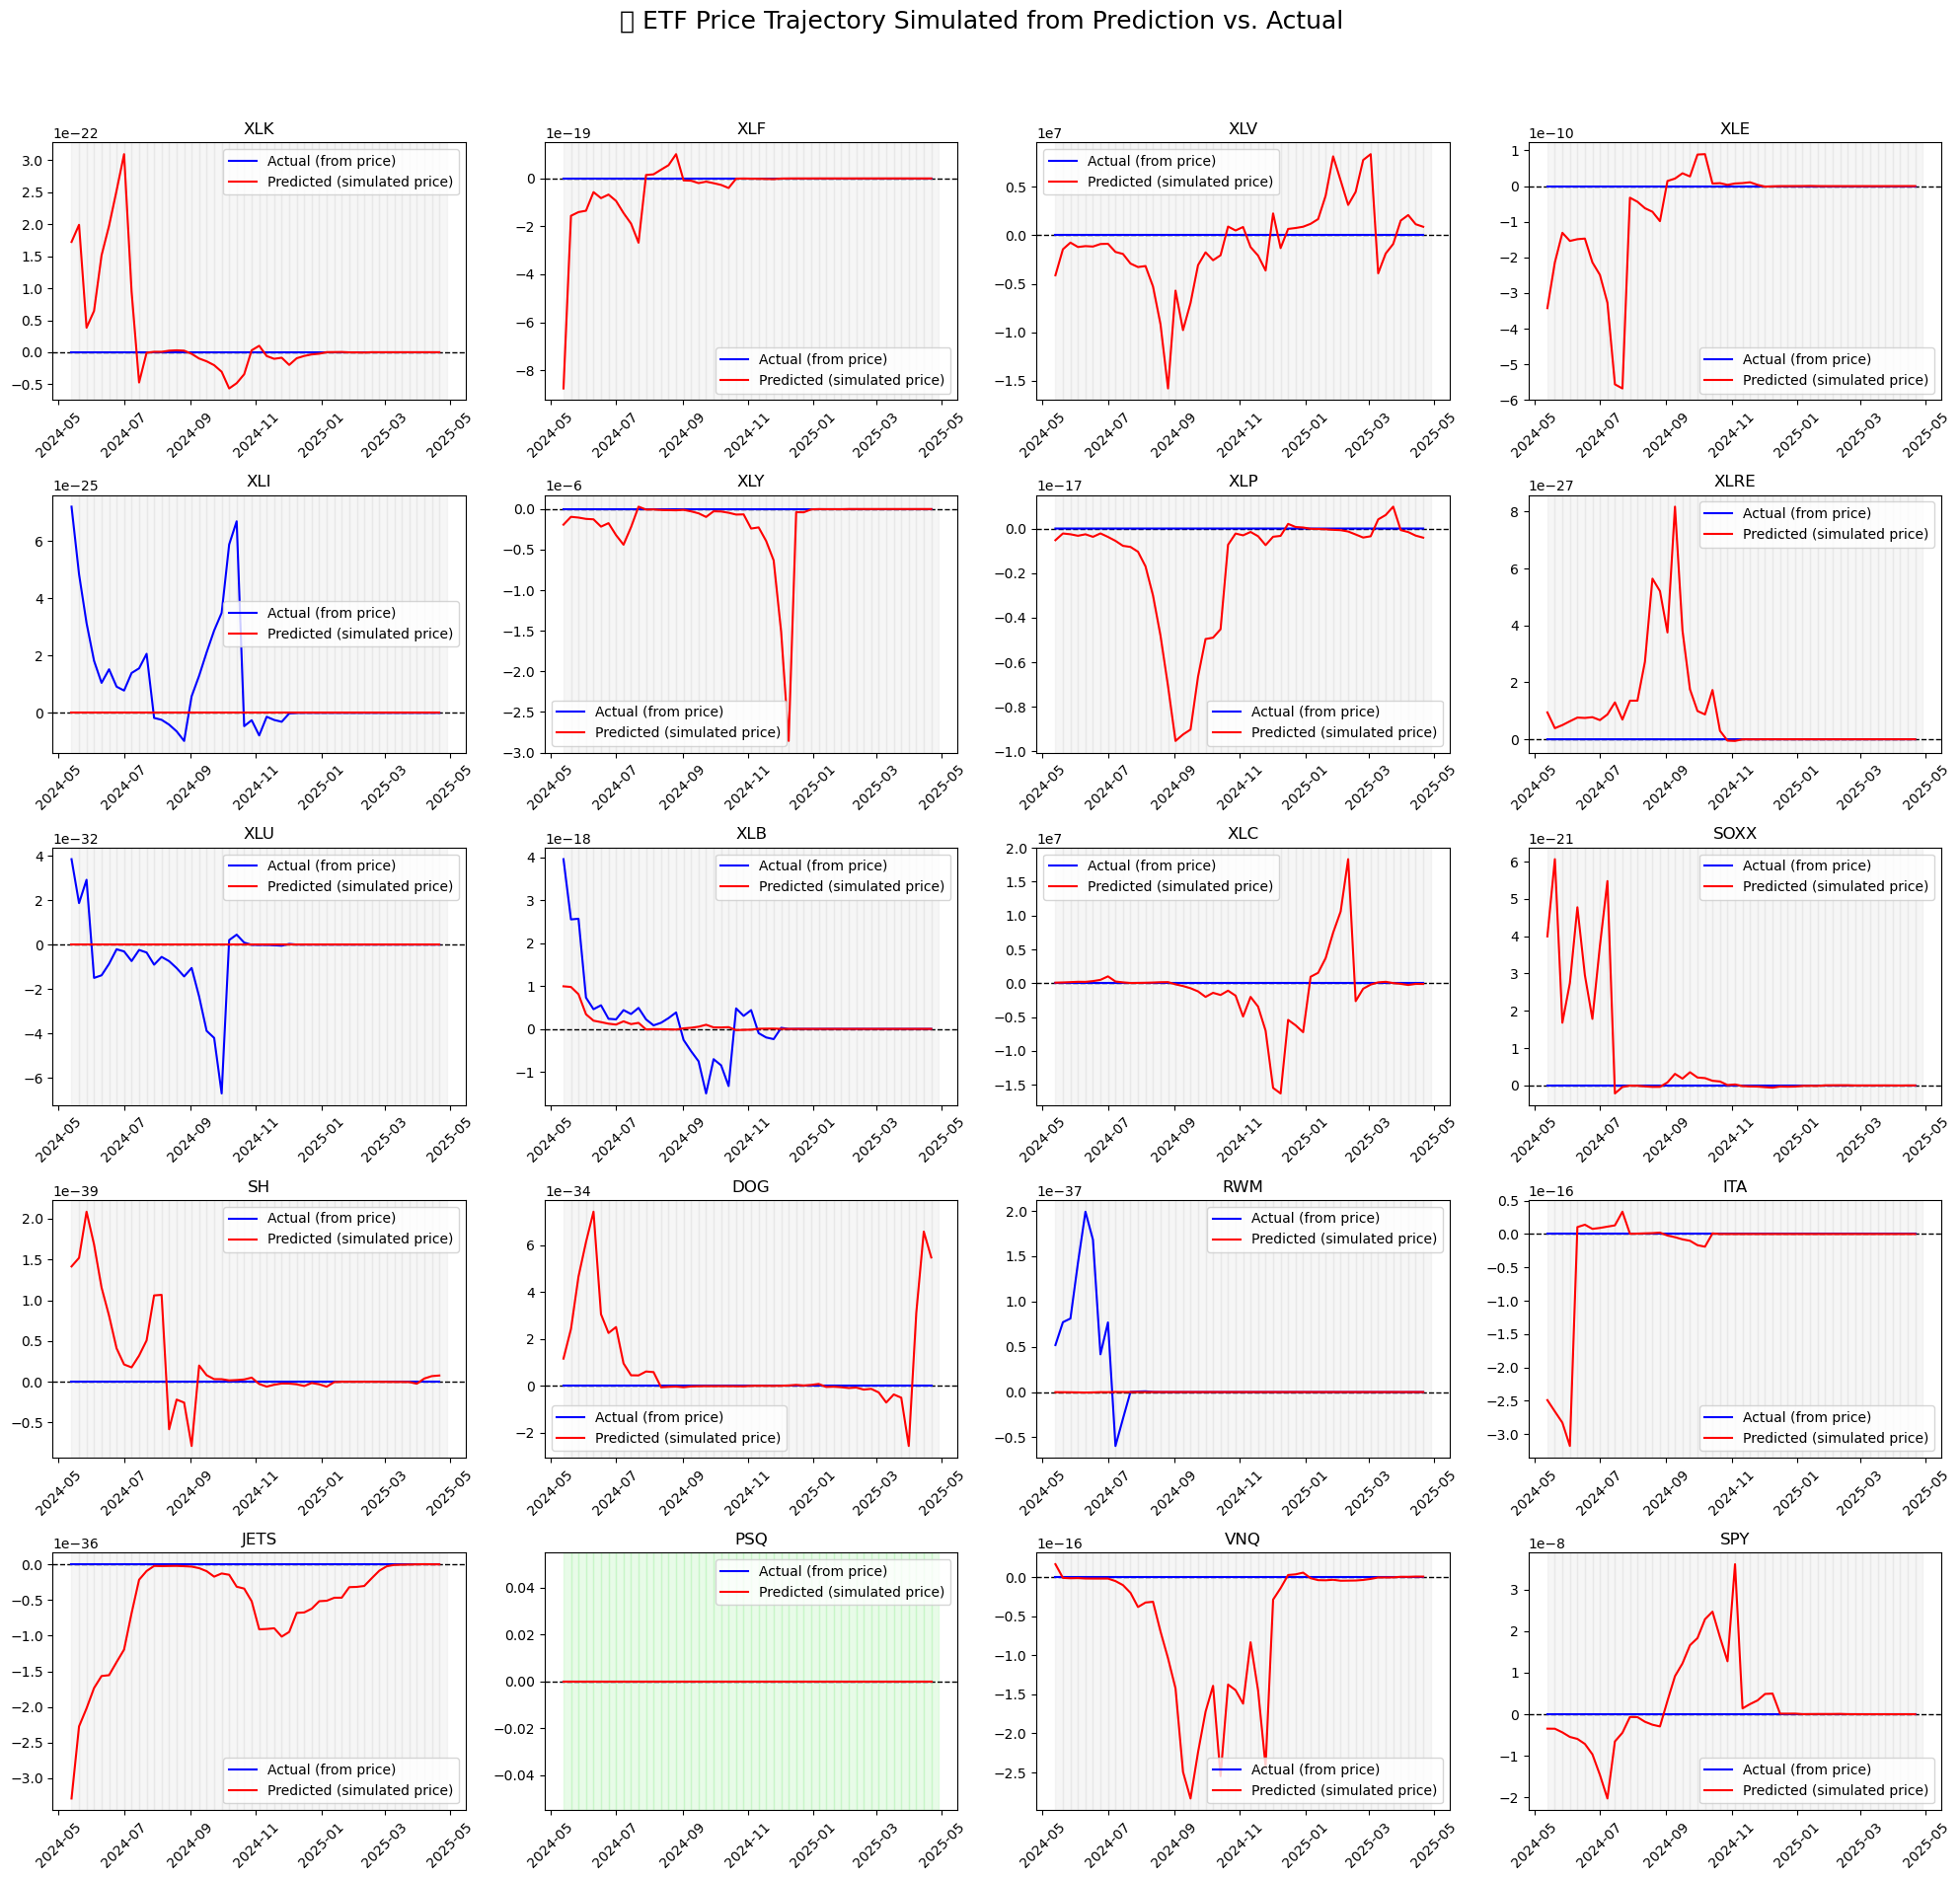

In [14]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from datetime import timedelta

# === Paths ===
data_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'dataset', 'normalized_matrix'))
model_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'model_weights'))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Gather predictions
plot_data = []

for etf in etf_list:
    try:
        feat_path = os.path.join(data_dir, f"{etf}_combined.csv")
        mask_path = os.path.join(data_dir, f"{etf}_mask.csv")
        model_path = os.path.join(model_dir, f"{etf}_top1.pt")

        df_feat = pd.read_csv(feat_path, index_col=0).astype('float32')
        df_mask = pd.read_csv(mask_path, index_col=0).astype('float32')

        if len(df_feat) < 5:
            continue

        X_seq = []
        M_seq = []
        y_seq = []
        price_seq = df_feat['price_change'].copy()

        for i in range(4, len(df_feat)):
            X_seq.append(df_feat.iloc[i-4:i].values)
            M_seq.append(df_mask.iloc[i-4:i].values)
            return_col = "price_change"
            target_index = df_feat.columns.get_loc(return_col)
            y_seq.append(df_feat.iloc[i, target_index])

        X_seq = torch.tensor(np.array(X_seq), dtype=torch.float32).to(device)
        M_seq = torch.tensor(np.array(M_seq), dtype=torch.float32).to(device)
        y_seq = np.array(y_seq)

        model = DualTransformerModel(num_features=X_seq.shape[-1]).to(device)
        model.load_state_dict(torch.load(model_path, map_location=device)['weights'])
        model.eval()

        with torch.no_grad():
            pred = model(X_seq, M_seq).cpu().numpy()

        date_index = pd.to_datetime(df_feat.index[4:])
        price_base = df_feat['price_change'].shift(1).iloc[4:].reset_index(drop=True)
        actual_prices = (1 + y_seq).cumprod() * 100
        predicted_prices = (1 + pred).cumprod() * 100


        df_plot = pd.DataFrame({
            'Date': date_index,
            'Predicted': predicted_prices,
            'Actual': actual_prices
        }).set_index('Date')
        plot_data.append((etf, df_plot.iloc[-50:]))

    except Exception as e:
        print(f"⚠️ Error loading/predicting {etf}: {e}")

# === Plotting
fig = plt.figure(figsize=(20, 4 * ((len(plot_data) + 3) // 4)))
gs = gridspec.GridSpec((len(plot_data) + 3) // 4, 4, figure=fig)

for i, (etf, df) in enumerate(plot_data):
    ax = fig.add_subplot(gs[i])
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.plot(df.index, df['Actual'], label='Actual (from price)', color='blue')
    ax.plot(df.index, df['Predicted'], label='Predicted (simulated price)', color='red')
    ax.set_title(etf)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    ymin, ymax = ax.get_ylim()
    for j, (pred, actual) in enumerate(zip(df['Predicted'], df['Actual'])):
        color = 'lightgreen' if np.sign(pred - actual) == 0 else 'lightgrey'
        start = df.index[j]
        end = start + timedelta(days=7)
        ax.axvspan(start, end, color=color, alpha=0.2)

fig.suptitle("📈 ETF Price Trajectory Simulated from Prediction vs. Actual", fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [7]:
import os
import pandas as pd
import torch
import numpy as np
from datetime import datetime, timedelta

# === Prediction Class ===
class WeeklyETFPredictor:
    def __init__(self, model_dir, data_dir, record_dir, price_path, device=None):
        self.model_dir = model_dir
        self.data_dir = data_dir
        self.record_dir = record_dir
        self.price_path = price_path
        os.makedirs(self.record_dir, exist_ok=True)
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def predict(self):
        # Get the nearest past Monday — this represents the start of the prediction week
        today = datetime.today()
        days_back = today.weekday() % 7
        monday = today - timedelta(days=days_back)
        monday_dt = pd.to_datetime(monday.strftime("%Y-%m-%d"))
        date_str = monday_dt.strftime("%Y-%m-%d")

        # Load ETF price data for reference
        price_df = pd.read_csv(
            self.price_path,
            index_col=0,
            parse_dates=True,
            date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d", errors='coerce')
        )
        price_df = price_df[price_df.index.notna()]
        price_df = price_df[~price_df.index.duplicated()].sort_index()

        print(f"🔍 Checking last available price dates: {price_df.index[-5:].to_list()}")
        print(f"📅 Using feature/price data for week starting on: {monday_dt.date()}")

        summary = []

        for fname in os.listdir(self.data_dir):
            if not fname.endswith("_combined.csv"):
                continue

            etf = fname.replace("_combined.csv", "")
            feat_path = os.path.join(self.data_dir, f"{etf}_combined.csv")
            mask_path = os.path.join(self.data_dir, f"{etf}_mask.csv")

            try:
                df_feat = pd.read_csv(feat_path, index_col=0, parse_dates=True)
                df_mask = pd.read_csv(mask_path, index_col=0, parse_dates=True)
            except Exception as e:
                print(f"❌ Error loading data for {etf}: {e}")
                continue

            if monday_dt not in df_feat.index:
                print(f"⚠️ No feature data for {etf} on {monday_dt.date()}")
                continue

            if etf not in price_df.columns or monday_dt not in price_df.index:
                print(f"⚠️ Price info missing for {etf} on {monday_dt.date()}")
                continue

            try:
                # Collect last 4 weeks (or pad if at beginning)
                idx_pos = df_feat.index.get_loc(monday_dt)
                if idx_pos < 3:
                    # Pad beginning if not enough data
                    x_real = df_feat.iloc[[0]* (4 - idx_pos) + list(range(idx_pos + 1))].values
                    x_mask = df_mask.iloc[[0]* (4 - idx_pos) + list(range(idx_pos + 1))].values
                else:
                    x_real = df_feat.iloc[idx_pos-3:idx_pos+1].values
                    x_mask = df_mask.iloc[idx_pos-3:idx_pos+1].values
                
                # Final tensor format: [1, 4, num_features]
                x_real = torch.tensor(x_real.astype(np.float32)).unsqueeze(0).to(self.device)
                x_mask = torch.tensor(x_mask.astype(np.float32)).unsqueeze(0).to(self.device)

                price = float(price_df.loc[monday_dt, etf])
            except Exception as e:
                print(f"❌ Tensor prep or price parse failed for {etf}: {e}")
                continue

            scores, preds, maes, winrates = [], [], [], []
            for i in range(1, 6):
                path = os.path.join(self.model_dir, f"{etf}_top{i}.pt")
                if not os.path.exists(path): continue

                try:
                    checkpoint = torch.load(path, map_location=self.device)
                    model = DualTransformerModel(num_features=x_real.shape[-1]).to(self.device)
                    model.load_state_dict(checkpoint['weights'])
                    model.eval()
                    with torch.no_grad():
                        pred = model(x_real, x_mask).item()
                    preds.append(pred)
                    maes.append(checkpoint['mae'])
                    winrates.append(checkpoint['win_rate'])
                    scores.append(checkpoint['weight'])
                except Exception as e:
                    print(f"❌ Model predict error for {etf} top{i}: {e}")

            if len(preds) == 0:
                continue

            pred_return = sum(p * w for p, w in zip(preds, scores))
            avg_mae = sum(maes) / len(maes)
            avg_win = sum(winrates) / len(winrates)

            if pred_return >= 0:
                target_up = round(price * (1 + pred_return / 100 + pred_return * avg_mae / 100), 2)
                stop_down = round(price * (1 - pred_return * avg_mae / 100), 2)
                buy_price = round(price, 2)
            else:
                target_up = stop_down = buy_price = "X"

            summary.append({
                'ETF': etf,
                'PredictedReturn': round(pred_return, 4),
                'MAE': round(avg_mae, 4),
                'WinRate': round(avg_win, 4),
                'BuyPrice': buy_price,
                'Target↑': target_up,
                'Stop↓': stop_down
            })

        summary_df = pd.DataFrame(summary)
        if summary_df.empty:
            print(f"⚠️ No valid predictions generated for {date_str}")
            return summary_df

        summary_df = summary_df.sort_values(by='PredictedReturn', ascending=False)

        # === Output
        print(f"\n📊 Weekly ETF Prediction Summary for {date_str}:")
        print(summary_df.to_string(index=False))

        output_path = os.path.join(self.record_dir, f"{date_str}_predict_record.csv")
        summary_df.to_csv(output_path, index=False)
        print(f"📁 Saved prediction to: {output_path}")

        return summary_df

# === Usage
predictor = WeeklyETFPredictor(
    model_dir="../model_weights",
    data_dir="../dataset/normalized_matrix",
    record_dir="../dataset/predict_record",
    price_path="../dataset/etf_prices_weekly.csv"
)
predictor.predict()


C:\Users\user\AppData\Local\Temp\ipykernel_38452\3528952398.py:26: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  price_df = pd.read_csv(
C:\Users\user\AppData\Local\Temp\ipykernel_38452\3528952398.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializa

🔍 Checking last available price dates: [Timestamp('2025-03-24 00:00:00'), Timestamp('2025-03-31 00:00:00'), Timestamp('2025-04-07 00:00:00'), Timestamp('2025-04-14 00:00:00'), Timestamp('2025-04-21 00:00:00')]
📅 Using feature/price data for week starting on: 2025-04-21


C:\Users\user\AppData\Local\Temp\ipykernel_38452\3528952398.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=self.device)
C:\U


📊 Weekly ETF Prediction Summary for 2025-04-21:
 ETF  PredictedReturn    MAE  WinRate BuyPrice Target↑   Stop↓
 XLC           1.4877 0.1272   0.9647    90.48    92.0   90.31
 XLV           1.2951 0.1766   0.9298   135.06  137.12  134.75
XLRE           1.1399 0.2102   0.8963    40.42   40.98   40.32
 ITA           0.9992 0.1789   0.8952   146.16  147.88   145.9
 XLU           0.6549 0.1870   0.9110     78.0   78.61    77.9
 XLB           0.3949 0.2220   0.9121    81.38   81.77   81.31
 XLY           0.2773 0.1735   0.9077   186.16  186.77  186.07
 XLP           0.2443 0.2044   0.9088    82.24   82.48    82.2
 SPY          -0.0101 0.1905   0.9066        X       X       X
 VNQ          -0.0243 0.1580   0.9309        X       X       X
 PSQ          -0.0493 0.1833   0.9375        X       X       X
  SH          -0.0777 0.1684   0.9151        X       X       X
SOXX          -0.1081 0.2143   0.9136        X       X       X
 DOG          -0.1291 0.1913   0.9066        X       X       X
 XLF  

C:\Users\user\AppData\Local\Temp\ipykernel_38452\3528952398.py:89: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=self.device)
C:\U

,ETF,PredictedReturn,MAE,WinRate,BuyPrice,Target↑,Stop↓
10,XLC,1.4877,0.1272,0.9647,90.48,92.0,90.31
18,XLV,1.2951,0.1766,0.9298,135.06,137.12,134.75
16,XLRE,1.1399,0.2102,0.8963,40.42,40.98,40.32
1,ITA,0.9992,0.1789,0.8952,146.16,147.88,145.9
17,XLU,0.6549,0.1870,0.9110,78.0,78.61,77.9
9,XLB,0.3949,0.2220,0.9121,81.38,81.77,81.31
19,XLY,0.2773,0.1735,0.9077,186.16,186.77,186.07
15,XLP,0.2443,0.2044,0.9088,82.24,82.48,82.2
7,SPY,-0.0101,0.1905,0.9066,X,X,X
8,VNQ,-0.0243,0.1580,0.9309,X,X,X


🔁 Loading price data...
📈 Loaded price data with 521 entries.
🔍 ETF list found: ['DOG', 'ITA', 'JETS', 'PSQ', 'RWM', 'SH', 'SOXX', 'SPY', 'VNQ', 'XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']

📅 Processing week: 2015-06-01 -> 2015-06-08


C:\Users\user\AppData\Local\Temp\ipykernel_38452\3941200508.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_df.index = pd.to_datetime(price_df.index, errors='coerce')



📅 Processing week: 2015-06-08 -> 2015-06-15

📅 Processing week: 2015-06-15 -> 2015-06-22

📅 Processing week: 2015-06-22 -> 2015-06-29

📅 Processing week: 2015-06-29 -> 2015-07-06

📅 Processing week: 2015-07-06 -> 2015-07-13

📅 Processing week: 2015-07-13 -> 2015-07-20

📅 Processing week: 2015-07-20 -> 2015-07-27

📅 Processing week: 2015-07-27 -> 2015-08-03

📅 Processing week: 2015-08-03 -> 2015-08-10

📅 Processing week: 2015-08-10 -> 2015-08-17

📅 Processing week: 2015-08-17 -> 2015-08-24

📅 Processing week: 2015-08-24 -> 2015-08-31

📅 Processing week: 2015-08-31 -> 2015-09-07

📅 Processing week: 2015-09-07 -> 2015-09-14

📅 Processing week: 2015-09-14 -> 2015-09-21

📅 Processing week: 2015-09-21 -> 2015-09-28

📅 Processing week: 2015-09-28 -> 2015-10-05

📅 Processing week: 2015-10-05 -> 2015-10-12

📅 Processing week: 2015-10-12 -> 2015-10-19

📅 Processing week: 2015-10-19 -> 2015-10-26

📅 Processing week: 2015-10-26 -> 2015-11-02

📅 Processing week: 2015-11-02 -> 2015-11-09

📅 Process

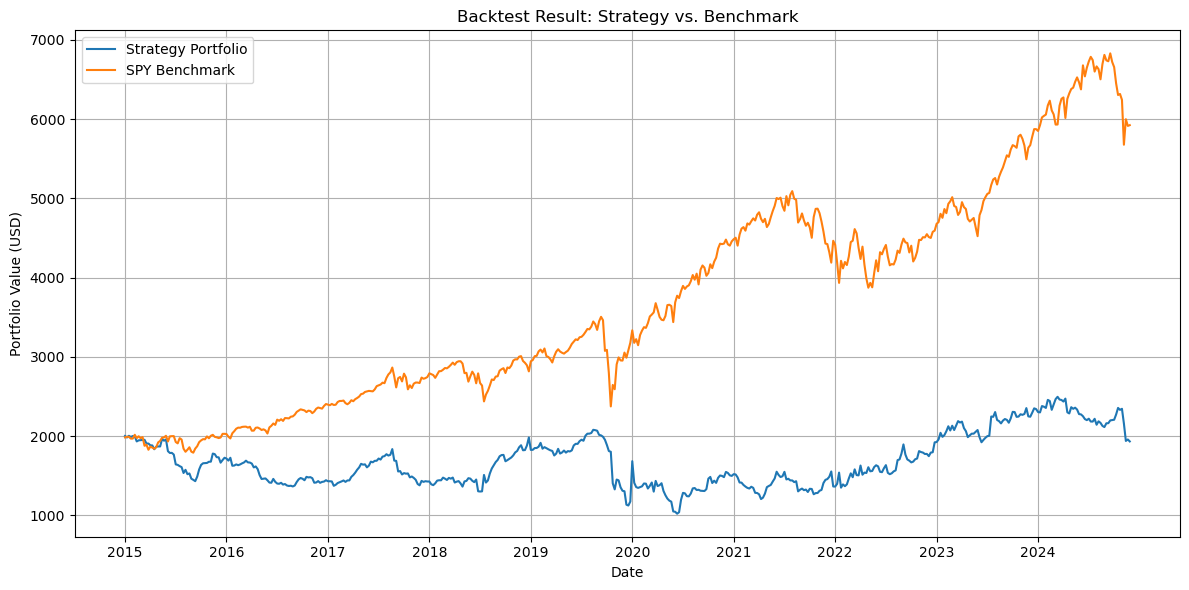


💰 Final Portfolio Value: $1,934.15
📈 Final Benchmark Value: $5,922.44
🎯 Strategy Return: -3.29%
📊 Benchmark Return: 196.12%


In [12]:
import os
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

warnings.filterwarnings("ignore", message=".*enable_nested_tensor.*")
warnings.filterwarnings("ignore", message=".*weights_only=False.*")

class ETFBacktester:
    def __init__(self, model_dir, data_dir, price_path, initial_cash=2000, benchmark_symbol='SPY', seq_len=4):
        self.model_dir = model_dir
        self.data_dir = data_dir
        self.price_path = price_path
        self.initial_cash = initial_cash
        self.benchmark_symbol = benchmark_symbol
        self.seq_len = seq_len
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def run(self):
        print("🔁 Loading price data...")
        price_df = pd.read_csv(self.price_path, index_col=0)
        price_df.index = pd.to_datetime(price_df.index, errors='coerce')
        price_df = price_df[price_df.index.notna()]
        price_df = price_df.apply(pd.to_numeric, errors='coerce')
        price_df = price_df[~price_df.index.duplicated()].sort_index()
        print(f"📈 Loaded price data with {len(price_df)} entries.")

        etf_list = [fname.replace('_combined.csv', '') for fname in os.listdir(self.data_dir) if fname.endswith('_combined.csv')]
        print(f"🔍 ETF list found: {etf_list}")

        cash = self.initial_cash
        holdings = {}
        portfolio_values = []
        benchmark_values = []
        dates = []
        trade_log = []
        value_log = []
        portfolio_changes = []

        for i in range(self.seq_len, len(price_df) - 1):
            date = price_df.index[i]
            prev_dates = price_df.index[i - self.seq_len:i]
            next_date = price_df.index[i + 1]
            print(f"\n📅 Processing week: {date.date()} -> {next_date.date()}")

            for etf, info in list(holdings.items()):
                if etf not in price_df.columns or next_date not in price_df.index:
                    continue
                try:
                    sell_price = float(price_df.loc[next_date, etf])
                except Exception:
                    continue
                shares = info['Shares']
                buy_price = info['BuyPrice']
                sell_value = shares * sell_price
                actual_return = (sell_price - buy_price) / buy_price
                predicted_return = info.get('PredictedReturn', None)
                cash += sell_value
                trade_log.append({
                    'Date': next_date.strftime('%Y-%m-%d'),
                    'ETF': etf,
                    'Action': 'Sell',
                    'Price': sell_price,
                    'Shares': shares,
                    'Value': sell_value,
                    'BuyPrice': buy_price,
                    'PredictedReturn': predicted_return,
                    'ActualReturn': actual_return * 100
                })
            holdings.clear()

            week_predictions = []
            for etf in etf_list:
                feat_path = os.path.join(self.data_dir, f"{etf}_combined.csv")
                mask_path = os.path.join(self.data_dir, f"{etf}_mask.csv")
                if not os.path.exists(feat_path) or not os.path.exists(mask_path):
                    continue

                feat_df = pd.read_csv(feat_path, index_col=0, parse_dates=True)
                mask_df = pd.read_csv(mask_path, index_col=0, parse_dates=True)

                if not all(d in feat_df.index for d in prev_dates):
                    continue

                x_seq = torch.tensor(feat_df.loc[prev_dates].values.astype(np.float32)).unsqueeze(0).to(self.device)
                x_mask = torch.tensor(mask_df.loc[prev_dates].values.astype(np.float32)).unsqueeze(0).to(self.device)

                scores, preds = [], []
                for j in range(1, 6):
                    model_path = os.path.join(self.model_dir, f"{etf}_top{j}.pt")
                    if not os.path.exists(model_path):
                        continue
                    checkpoint = torch.load(model_path, map_location=self.device)
                    model = DualTransformerModel(num_features=x_seq.shape[-1]).to(self.device)
                    model.load_state_dict(checkpoint['weights'])
                    model.eval()
                    with torch.no_grad():
                        pred = model(x_seq, x_mask).item()
                    preds.append(pred)
                    scores.append(checkpoint['weight'])

                if preds:
                    pred_return = sum(p * w for p, w in zip(preds, scores))
                    try:
                        price = float(price_df.loc[date, etf])
                    except Exception:
                        continue
                    if not np.isnan(price):
                        week_predictions.append({
                            'ETF': etf,
                            'BuyPrice': price,
                            'PredictedReturn': float(pred_return)
                        })

            week_predictions = sorted(week_predictions, key=lambda x: -x['PredictedReturn'])[:2]

            budget_per_etf = cash / 2
            for item in week_predictions:
                etf = item['ETF']
                price = item['BuyPrice']
                shares = int(budget_per_etf // price)
                cost = shares * price
                if shares <= 0 or cost > cash:
                    continue
                cash -= cost
                holdings[etf] = {'Shares': shares, 'BuyPrice': price, 'PredictedReturn': item['PredictedReturn']}
                trade_log.append({
                    'Date': date.strftime('%Y-%m-%d'),
                    'ETF': etf,
                    'Action': 'Buy',
                    'Price': price,
                    'Shares': shares,
                    'Value': cost,
                    'PredictedReturn': item['PredictedReturn']
                })

            value = cash
            for etf, info in holdings.items():
                try:
                    price = float(price_df.loc[next_date, etf])
                except Exception:
                    price = 0
                value += info['Shares'] * price

            prev_value = portfolio_values[-1] if portfolio_values else self.initial_cash
            change_pct = ((value - prev_value) / prev_value) * 100

            portfolio_values.append(value)
            portfolio_changes.append(change_pct)
            dates.append(next_date.strftime('%Y-%m-%d'))
            value_log.append({
                'Date': next_date.strftime('%Y-%m-%d'),
                'Value': value,
                'Cash': cash,
                'Change%': change_pct,
                'Holdings': {k: dict(v) for k, v in holdings.items()}
            })

            if self.benchmark_symbol in price_df.columns:
                base_price = price_df[self.benchmark_symbol].iloc[0]
                current_price = price_df.loc[next_date, self.benchmark_symbol]
                benchmark_values.append(self.initial_cash * (current_price / base_price))
            else:
                benchmark_values.append(value)

        result_df = pd.DataFrame({
            'Date': dates,
            'PortfolioValue': portfolio_values,
            'BenchmarkValue': benchmark_values,
            'PortfolioChange%': portfolio_changes
        })
        result_df['Date'] = pd.to_datetime(result_df['Date'], errors='coerce')
        result_df.set_index('Date', inplace=True)

        pd.DataFrame(trade_log).to_csv("../dataset/backtest_trade_log.csv", index=False)
        pd.DataFrame(value_log).to_csv("../dataset/backtest_value_log.csv", index=False)

        plt.figure(figsize=(12, 6))
        plt.plot(result_df['PortfolioValue'], label='Strategy Portfolio')
        plt.plot(result_df['BenchmarkValue'], label=f'{self.benchmark_symbol} Benchmark')
        plt.title("Backtest Result: Strategy vs. Benchmark")
        plt.ylabel("Portfolio Value (USD)")
        plt.xlabel("Date")
        xticks_idx = result_df.index[::52]
        xticks_labels = [d.strftime('%Y') for d in xticks_idx]
        plt.xticks(xticks_idx, xticks_labels)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print(f"\n💰 Final Portfolio Value: ${result_df['PortfolioValue'].iloc[-1]:,.2f}")
        print(f"📈 Final Benchmark Value: ${result_df['BenchmarkValue'].iloc[-1]:,.2f}")
        print(f"🎯 Strategy Return: {((result_df['PortfolioValue'].iloc[-1] / self.initial_cash - 1) * 100):.2f}%")
        print(f"📊 Benchmark Return: {((result_df['BenchmarkValue'].iloc[-1] / self.initial_cash - 1) * 100):.2f}%")

        return result_df

# === Execute
backtester = ETFBacktester(
    model_dir="../model_weights",
    data_dir="../dataset/normalized_matrix",
    price_path="../dataset/etf_prices_weekly.csv",
    initial_cash=2000,
    benchmark_symbol="SPY",
    seq_len=4
)

result_df = backtester.run()  # ⬅️ THIS must be included!
